# Imports

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import constants
import coordinates
from symbolic_math import Jacobian, F, evaluateA

import scipy.io
A_t0_true = scipy.io.loadmat('./problem_data_files/A_t0.mat')['A']

# Print the symbolic X_dot = F(t, X) and its Jacobian, which is the A matrix

In [3]:
F.T

Matrix([[xdot, ydot, zdot, -1.05333333333333*A_cell*p_SRP*x_sun/m - 0.5*A_x*C_d*rho_0*xdot*(xdot**2 + ydot**2 + zdot**2)**0.5*exp((r_0 - (x**2 + y**2 + z**2)**0.5)/H)/m + 0.125*mu_E*x*(60.0*J2*R_E**2*z**2*(x**2 + y**2 + z**2)**26.5 - 12.0*J2*R_E**2*(x**2 + y**2 + z**2)**27.5 + 140.0*J3*R_E**3*z**3*(x**2 + y**2 + z**2)**25.5 - 60.0*J3*R_E**3*z*(x**2 + y**2 + z**2)**26.5 + 306.0*J4*R_E**4*z**4*(x**2 + y**2 + z**2)**24.5 - 210.0*J4*R_E**4*z**2*(x**2 + y**2 + z**2)**25.5 + 15.0*J4*R_E**4*(x**2 + y**2 + z**2)**26.5 - 8.0*(x**2 + y**2 + z**2)**28.5)/(x**2 + y**2 + z**2)**30.0 + mu_M*(-x_moon/(x_moon**2 + y_moon**2 + z_moon**2)**1.5 + (-x + x_moon)/((-x + x_moon)**2 + (-y + y_moon)**2 + (-z + z_moon)**2)**1.5) + mu_S*(-x_sun/(x_sun**2 + y_sun**2 + z_sun**2)**1.5 + (-x + x_sun)/((-x + x_sun)**2 + (-y + y_sun)**2 + (-z + z_sun)**2)**1.5), -1.05333333333333*A_cell*p_SRP*y_sun/m - 0.5*A_x*C_d*rho_0*ydot*(xdot**2 + ydot**2 + zdot**2)**0.5*exp((r_0 - (x**2 + y**2 + z**2)**0.5)/H)/m + 0.125*mu_E*y*(

In [4]:
Jacobian

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# Evaluate the Jacobian at t_0

In [10]:
from force_models import accelerations

t0 = constants.init_epoch*86400
sun_vec_t0 = accelerations(t0, constants.s_i5, return_extras = True)[5]
moon_vec_t0 = accelerations(t0, constants.s_i5, return_extras = True)[6]

# PNRW = coordinates.ecef_eci(constants.init_epoch)
# ri = PNRW.T @ constants.r_i
# vi = PNRW.T @ constants.v_i
# si = np.concatenate([ri,vi])
si = constants.s_i

A_t0 = evaluateA(si, sun_vec_t0, moon_vec_t0)


/tmp/ipykernel_710609/4165376396.py:2: RuntimeWarning: divide by zero encountered in log10
  color = plt.imshow(np.log10(np.abs(A_t0)))


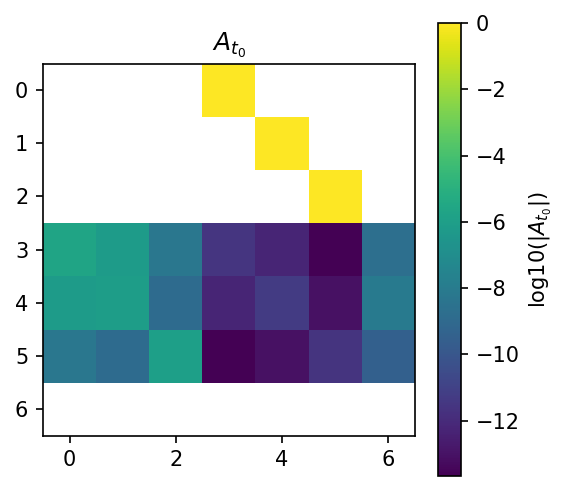

In [15]:
fig = plt.figure(figsize=(4,4),dpi=150)
color = plt.imshow(np.log10(np.abs(A_t0)))
plt.colorbar(color,label='log10(|$A_{t_0}$|)')
plt.title('$A_{t_0}$')
plt.show()

# Compare to A_t0.mat

/tmp/ipykernel_710609/3266312732.py:2: RuntimeWarning: divide by zero encountered in log10
  color = plt.imshow(np.log10(np.abs(A_t0_true)))


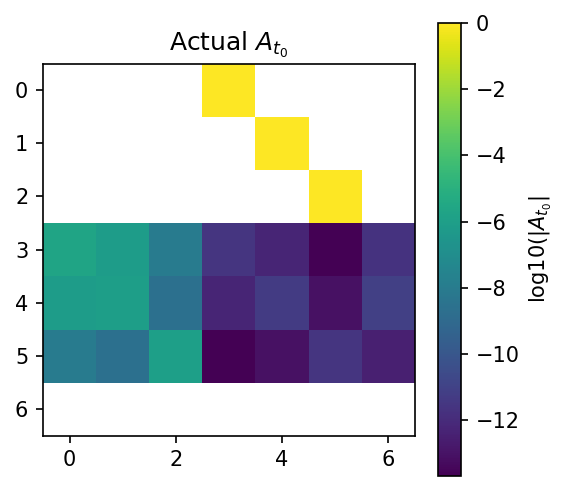

In [16]:
fig = plt.figure(figsize=(4,4),dpi=150)
color = plt.imshow(np.log10(np.abs(A_t0_true)))
plt.colorbar(color,label='log10(|$A_{t_0}$|')
plt.title('Actual $A_{t_0}$')
plt.show()

In [17]:
reldiff = np.abs((A_t0 - A_t0_true) / A_t0_true)
reldiff = np.nan_to_num(reldiff)

/tmp/ipykernel_710609/4267396156.py:1: RuntimeWarning: invalid value encountered in divide
  reldiff = np.abs((A_t0 - A_t0_true) / A_t0_true)


/tmp/ipykernel_710609/798162568.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.nan_to_num(np.log10(reldiff.flatten()),posinf=np.nan, neginf=np.nan),bins=20)


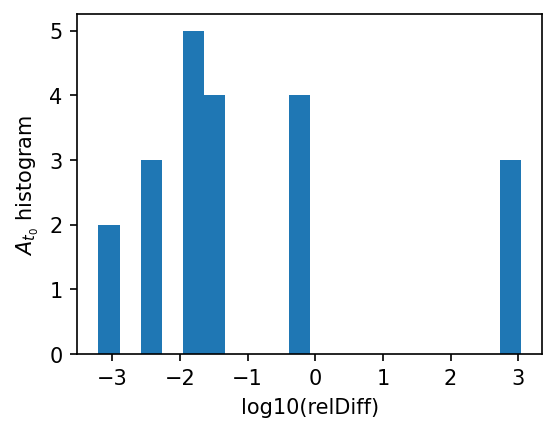

In [18]:
fig = plt.figure(figsize=(4,3),dpi=150)
plt.hist(np.nan_to_num(np.log10(reldiff.flatten()),posinf=np.nan, neginf=np.nan),bins=20)
plt.ylabel('$A_{t_0}$ histogram')
plt.xlabel('log10(relDiff)')
plt.show()

/tmp/ipykernel_710609/1553863771.py:2: RuntimeWarning: divide by zero encountered in log10
  pos = plt.imshow(np.nan_to_num(np.log10(reldiff),posinf=np.nan, neginf=np.nan))


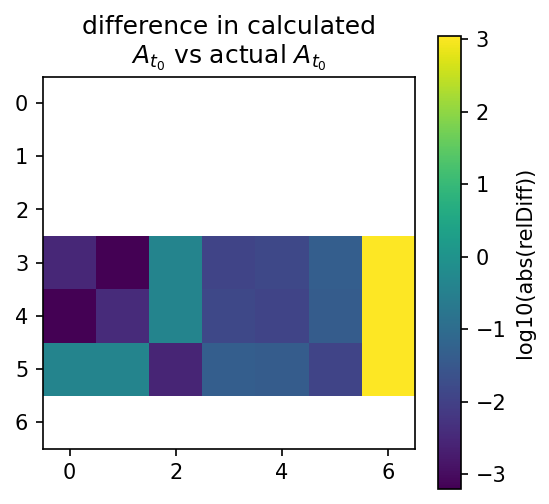

In [19]:
fig = plt.figure(figsize=(4,4),dpi=150)
pos = plt.imshow(np.nan_to_num(np.log10(reldiff),posinf=np.nan, neginf=np.nan))
plt.colorbar(pos,label='log10(abs(relDiff))')
plt.title('difference in calculated\n$A_{t_0}$ vs actual $A_{t_0}$')
plt.show()

/tmp/ipykernel_710609/965168682.py:7: RuntimeWarning: invalid value encountered in divide
  reldiff = np.abs((A_t0_test - A_t0_true[:6,:6]) / A_t0_true[:6,:6])
/tmp/ipykernel_710609/965168682.py:18: RuntimeWarning: invalid value encountered in divide
  reldiffe = np.abs((A_t0_test2 - A_t0_true[:6,:6]) / A_t0_true[:6,:6])
/tmp/ipykernel_710609/965168682.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.nan_to_num(np.log10(reldiff.flatten()),posinf=np.nan, neginf=np.nan),bins=20,alpha=0.5,label='J4+perturbs')
/tmp/ipykernel_710609/965168682.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.nan_to_num(np.log10(reldiffe.flatten()),posinf=np.nan, neginf=np.nan),bins=20,alpha=0.5,label='J4 only')


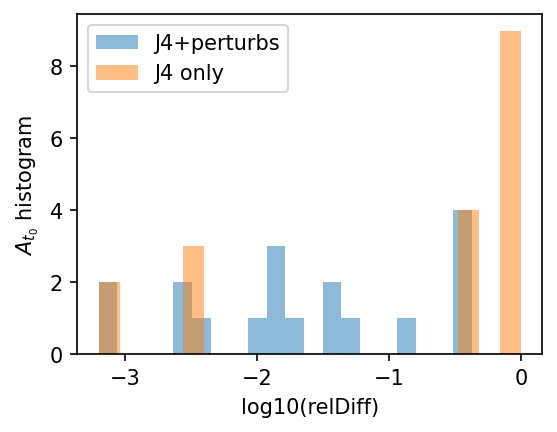

In [20]:
import scipy.optimize
from force_models import dynamics
def dyn_wrapper(s):
    return dynamics(constants.init_epoch*86400,s, ['J4','cannonball','cannonball',1,1])
A_t0_test = scipy.optimize.approx_fprime(constants.s_i, dyn_wrapper, epsilon=1e-1)

reldiff = np.abs((A_t0_test - A_t0_true[:6,:6]) / A_t0_true[:6,:6])
reldiff = np.nan_to_num(reldiff)

absdiff = np.abs(A_t0_test - A_t0_true[:6,:6])
absdiff = np.nan_to_num(absdiff)


def dyn_wrapper2(s):
    return dynamics(constants.init_epoch*86400,s, ['J4',0,0,0,0])
A_t0_test2 = scipy.optimize.approx_fprime(constants.s_i, dyn_wrapper2, epsilon=1e-1)

reldiffe = np.abs((A_t0_test2 - A_t0_true[:6,:6]) / A_t0_true[:6,:6])
reldiffe = np.nan_to_num(reldiffe)

fig = plt.figure(figsize=(4,3),dpi=150)
plt.hist(np.nan_to_num(np.log10(reldiff.flatten()),posinf=np.nan, neginf=np.nan),bins=20,alpha=0.5,label='J4+perturbs')

plt.ylabel('$A_{t_0}$ histogram')
plt.xlabel('log10(relDiff)')

plt.hist(np.nan_to_num(np.log10(reldiffe.flatten()),posinf=np.nan, neginf=np.nan),bins=20,alpha=0.5,label='J4 only')
plt.legend()
plt.show()

/tmp/ipykernel_710609/3668725984.py:2: RuntimeWarning: divide by zero encountered in log10
  pos = plt.imshow(np.nan_to_num(np.log10(reldiff),posinf=np.nan, neginf=np.nan))


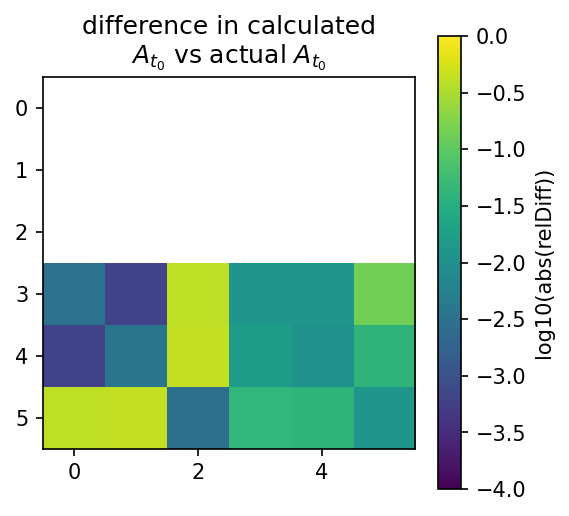

In [23]:
fig = plt.figure(figsize=(4,4),dpi=150)
pos = plt.imshow(np.nan_to_num(np.log10(reldiff),posinf=np.nan, neginf=np.nan))
plt.colorbar(pos,label='log10(abs(relDiff))')
plt.clim(-4,0)
plt.title('difference in calculated\n$A_{t_0}$ vs actual $A_{t_0}$')
plt.show()

/tmp/ipykernel_625367/3627675653.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(A_t0_test)))


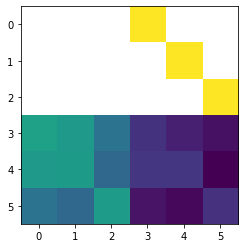

In [11]:
plt.imshow(np.log10(np.abs(A_t0_test)))

/tmp/ipykernel_710609/1912463482.py:2: RuntimeWarning: divide by zero encountered in log10
  pos = plt.imshow(np.nan_to_num(np.log10(absdiff),posinf=np.nan, neginf=np.nan))


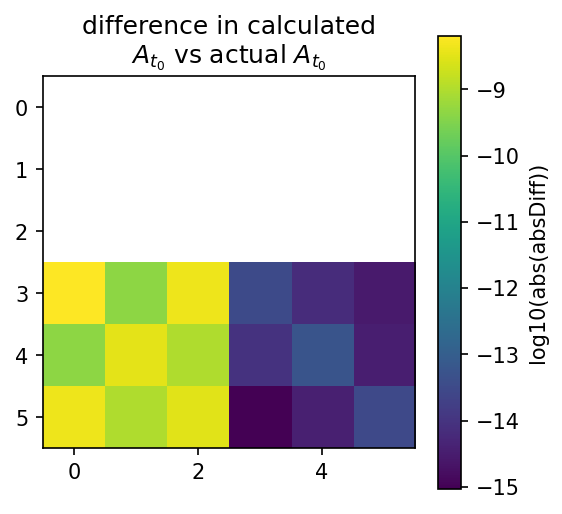

In [24]:
fig = plt.figure(figsize=(4,4),dpi=150)
pos = plt.imshow(np.nan_to_num(np.log10(absdiff),posinf=np.nan, neginf=np.nan))
plt.colorbar(pos,label='log10(abs(absDiff))')
plt.title('difference in calculated\n$A_{t_0}$ vs actual $A_{t_0}$')
plt.show()

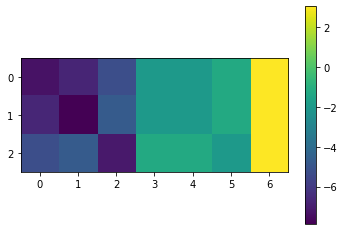

In [263]:
pos = plt.imshow(np.nan_to_num(np.log10(reldiff[3:6,:7]),posinf=np.nan, neginf=np.nan))
plt.colorbar(pos)

/tmp/ipykernel_45840/1307313783.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(A_t0))[3:6])


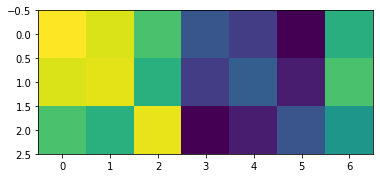

In [265]:
plt.imshow(np.log10(np.abs(A_t0))[3:6])

/tmp/ipykernel_45840/1349797220.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(A_t0_true))[3:6])


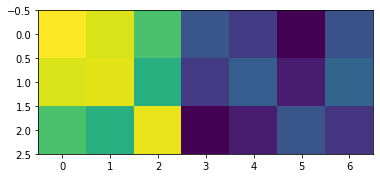

In [266]:
plt.imshow(np.log10(np.abs(A_t0_true))[3:6])

In [213]:
A_t0_true[3:6,6:7]

array([[ 1.97068091e-12],
       [-8.56007671e-12],
       [-3.19786087e-13]])

In [214]:
A_t0[3:6,6:7]

array([[ 2.27954044e-09],
       [-9.89812890e-09],
       [-3.43860082e-10]])

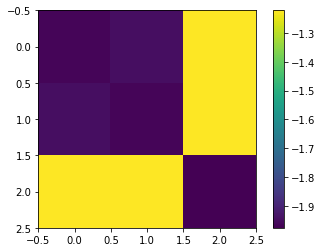

In [269]:
pos = plt.imshow(np.nan_to_num(np.log10(reldiff[3:6,3:6]),posinf=np.nan, neginf=np.nan))
plt.colorbar(pos)

In [270]:
A_t0_true[3:6,3:6]

array([[-2.65829598e-12,  5.52635848e-13,  2.06452887e-14],
       [ 5.52635848e-13, -4.93156220e-12, -8.96772552e-14],
       [ 2.06452887e-14, -8.96772552e-14, -2.53441959e-12]])

In [271]:
A_t0[3:6,3:6]

array([[-2.68702220e-12,  5.58864794e-13,  1.94149112e-14],
       [ 5.58864794e-13, -4.98499581e-12, -8.43026474e-14],
       [ 1.94149112e-14, -8.43026474e-14, -2.56124422e-12]])

In [272]:
A_t0_true[3:6,3:6] / A_t0[3:6,3:6]

array([[0.98930927, 0.98885429, 1.06337281],
       [0.98885429, 0.98928111, 1.06375372],
       [1.06337281, 1.06375372, 0.98952672]])

In [273]:
1/0.0008645079838987195

1156.7273161437383

In [274]:
1/0.0008648176636697467

1156.313107385693

In [275]:
1/0.0009299889802271378

1075.2815584500397